# LOGISTIC REGRESSION

## Logistic regression has several requirements and assumptions that should be considered when applying the model:

## - Binary outcome: Logistic regression is designed for binary classification tasks, where the outcome variable has two possible categories or classes. If the outcome has more than two categories, extensions of logistic regression such as multinomial logistic regression should be used.

## - Independence of observations: Logistic regression assumes that the observations are independent of each other. In other words, the presence or absence of an outcome for one observation does not affect the presence or absence of the outcome for other observations. Violation of this assumption, such as in clustered or time-dependent data, may require the use of alternative models or appropriate statistical techniques.

## - Linearity in the logit: Logistic regression assumes a linear relationship between the independent variables and the logarithm of the odds of the outcome. This implies that the logit (the natural logarithm of the odds) is a linear function of the predictors. It is essential to assess the linearity assumption and consider transformations or interactions of variables if necessary.

## - Absence of multicollinearity: Multicollinearity refers to a high correlation between independent variables in the logistic regression model. When variables are highly correlated, it can be challenging to interpret the individual effects of each predictor. It is recommended to assess multicollinearity and consider techniques such as variance inflation factor (VIF) or dimensionality reduction methods to mitigate its impact.

## - Adequate sample size: Logistic regression requires a sufficient number of observations compared to the number of predictors to obtain reliable estimates. A commonly suggested guideline is to have at least 10-20 events (occurrences of the positive outcome) per predictor variable. Insufficient sample size can lead to unstable estimates and unreliable inference.

## - No outliers: Logistic regression can be sensitive to outliers, which are extreme values that deviate significantly from the overall pattern of the data. Outliers can influence the estimated coefficients and affect the performance of the model. It is important to detect and handle outliers appropriately, using techniques such as robust regression or data transformations.

## - Independence of errors: Logistic regression assumes that the errors or residuals are independent and have a constant variance (homoscedasticity). Violation of this assumption can lead to biased or inefficient estimates. It is advisable to check for patterns in the residuals and consider appropriate adjustments if needed.

## - Goodness of fit: Assessing the goodness of fit of the logistic regression model is crucial. Various measures such as deviance, likelihood ratio tests, or information criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) can be used to evaluate the model's fit to the data and compare different models.

## Logistic regression is a statistical model used for binary classification tasks, where the goal is to predict the probability of an event belonging to one of two possible outcomes. It is widely used in various fields, including machine learning, statistics, and social sciences.

## The main idea behind logistic regression is to model the relationship between the independent variables (also known as features or predictors) and the binary outcome using a logistic function. The logistic function, also called the sigmoid function, maps any real-valued number to a value between 0 and 1. This allows us to interpret the output of logistic regression as a probability.

## The logistic regression equation represents the relationship between the independent variables (predictors) and the predicted probability of the binary outcome. In its simplest form, the logistic regression equation can be expressed as:

## p = 1 / (1 + e^(-z))

## Where:

## - p represents the predicted probability of the event occurring.
## - z is the linear combination of the independent variables, weighted by their respective coefficients.

## To calculate z, the logistic regression equation incorporates the concept of log-odds (logit). The log-odds is the logarithm of the odds of the event occurring, and it is modeled as a linear function of the predictors. Mathematically, z can be written as:

## z = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ

## Where:

## - z is the log-odds (logit).
## - β₀, β₁, β₂, ..., βₚ are the coefficients or weights assigned to each predictor.
## - x₁, x₂, ..., xₚ are the values of the predictors.
## The logistic function (sigmoid function) is applied to the linear combination z to transform it into a predicted probability p between 0 and 1. The logistic function converts the log-odds to the probability scale. Specifically, it calculates the probability of the event occurring (p) as:

## p = 1 / (1 + e^(-z))

## In practice, the logistic regression model estimates the coefficients β₀, β₁, β₂, ..., βₚ based on the training data using techniques such as maximum likelihood estimation. These coefficients represent the magnitude and direction of the influence of each predictor on the log-odds and, consequently, on the predicted probability of the outcome.



## What is Perceptron Trick

## The perceptron trick is a method used to update the weights of a perceptron (a type of artificial neural network) during the learning process. The perceptron is a simple linear classifier that can be used for binary classification tasks. It takes a set of input features, applies weights to them, and produces an output prediction.

## The perceptron trick is specifically used for updating the weights of the perceptron in order to improve its accuracy in classifying new instances. 

In [20]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [21]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


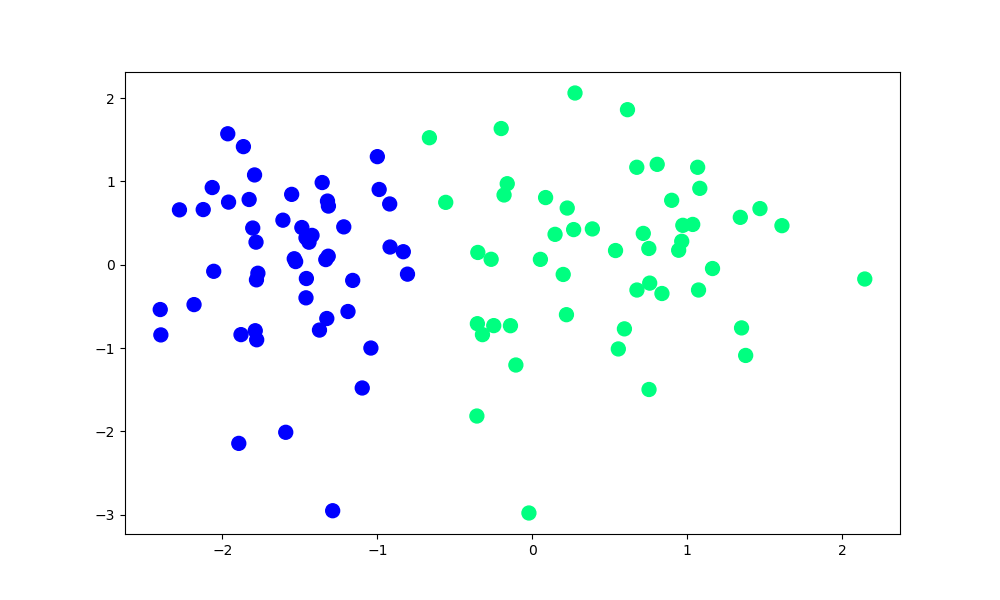

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [23]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [24]:
def step(z):
    return 1 if z>0 else 0

In [25]:
intercept_,coef_ = perceptron(X,y)

In [26]:
print(coef_)
print(intercept_)

[1.29688686 0.19676937]
0.9


In [27]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [28]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

<IPython.core.display.Javascript object>


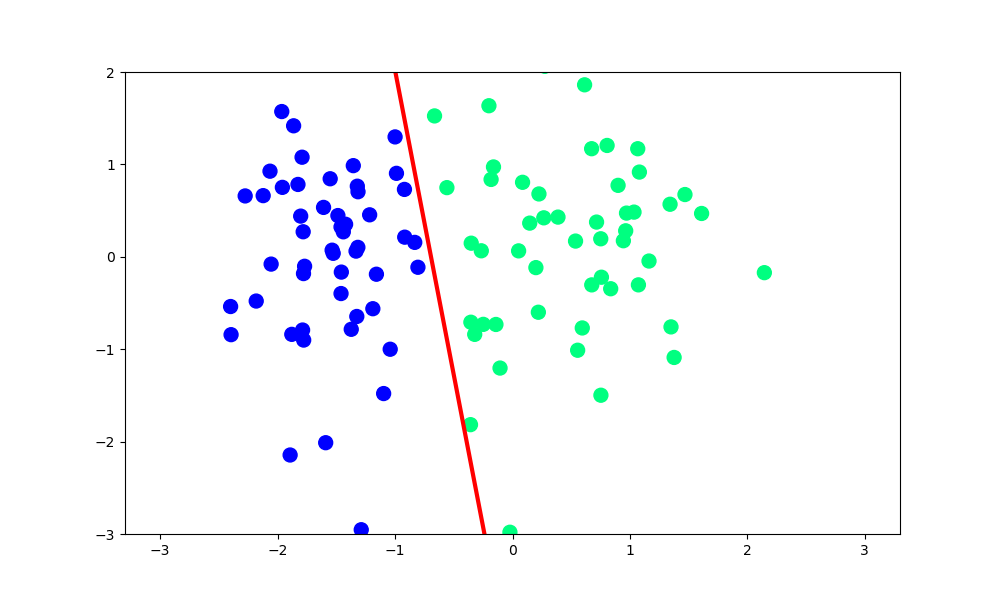

(-3.0, 2.0)

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [30]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [31]:
m,b = perceptron(X,y)

In [32]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


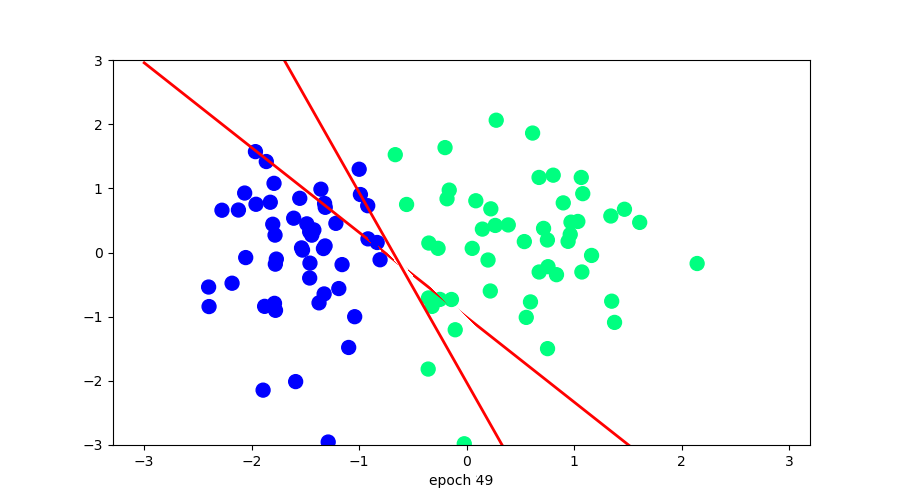

In [34]:
fig, ax = plt.subplots(figsize=(9,5))
x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [15]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [16]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [17]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b


<IPython.core.display.Javascript object>


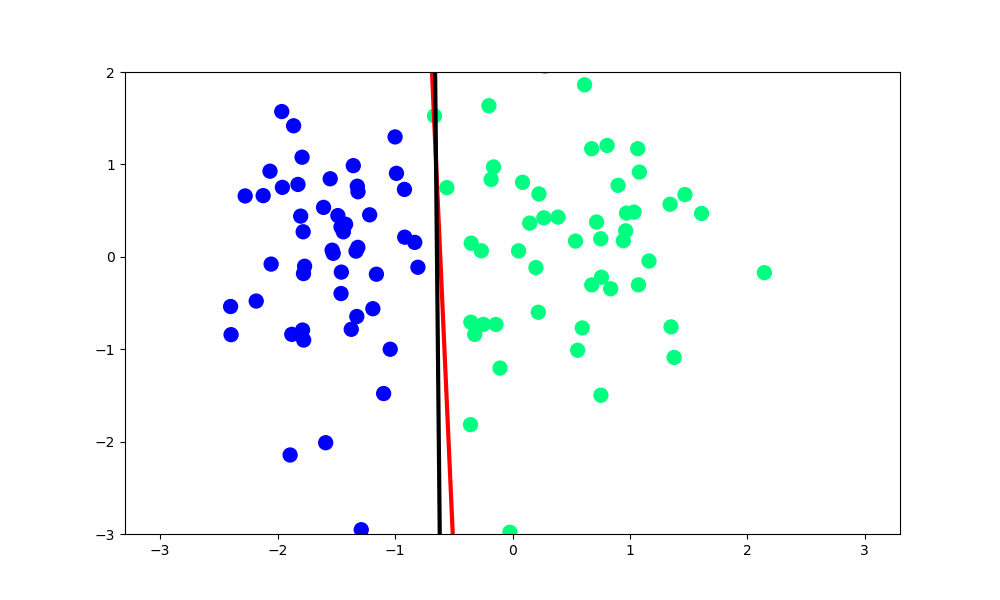

(-3.0, 2.0)

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Why use scikit Logistic Regression instead of Perceptron? 
## That is because after getting the model that satsfy our condition Perceptron do not try to optimise it where as the scikit give us the most optimised solution :)

## - Probabilistic Output: Logistic regression provides probabilistic output in the form of predicted probabilities. It estimates the probability of an instance belonging to a particular class. In contrast, the perceptron only provides binary output, indicating the predicted class. The probabilistic output of logistic regression can be useful in various applications, such as risk assessment or ranking.

## - Better Handling of Non-Linear Data: Logistic regression can handle non-linear relationships between the predictors and the outcome variable by applying appropriate feature engineering techniques or incorporating non-linear transformations. In contrast, the perceptron is a linear classifier and can only classify linearly separable data. Logistic regression allows for more flexibility in capturing complex patterns in the data.

## - Optimization Objective: Logistic regression optimizes the likelihood function or log-loss function during training. It finds the parameters that maximize the likelihood of observing the given data. On the other hand, the perceptron algorithm minimizes the number of misclassifications. Maximizing the likelihood or minimizing the log-loss is a more principled and statistically grounded approach, making logistic regression more reliable in terms of modeling.

## - Regularization: Scikit-learn's logistic regression implementation supports various regularization techniques, such as L1 (Lasso) and L2 (Ridge) regularization. Regularization helps to prevent overfitting and improves the model's generalization ability by adding a penalty term to the optimization objective. The perceptron algorithm does not inherently provide regularization, which can lead to overfitting on complex datasets.

## Support for Multiclass Classification: Logistic regression naturally extends to multiclass classification tasks using techniques like one-vs-rest or multinomial logistic regression. Scikit-learn's logistic regression implementation supports these techniques, allowing for straightforward handling of datasets with multiple classes. The perceptron, in its basic form, is designed for binary classification and requires modifications or combinations to handle multiclass problems.

# Now let's move to Sigmoid function from Perceptron
## The sigmoid function, also known as the logistic function, is a mathematical function used in logistic regression. It maps any real-valued number to a value between 0 and 1. In logistic regression, the sigmoid function is employed to transform the linear combination of the independent variables into a predicted probability.

## The sigmoid function has the following characteristics:

## Range: The sigmoid function's output is bounded between 0 and 1. When z is a large positive number, the function approaches 1, indicating a high probability of the event occurring. Conversely, when z is a large negative number, the function approaches 0, indicating a low probability of the event occurring. When z is close to zero, the sigmoid function outputs 0.5, representing an equal probability.

## S-Shaped Curve: The graph of the sigmoid function exhibits an S-shaped curve. It starts at zero when z approaches negative infinity and approaches one as z approaches positive infinity. The steepness of the curve around the point of inflection depends on the value of z.

## The sigmoid function's characteristics make it well-suited for logistic regression because it allows the transformation of a linear combination of predictors into a predicted probability. By setting a threshold (often 0.5), logistic regression models can classify instances into binary outcomes based on whether the predicted probability is above or below the threshold.


# What is Likelihood?

## In logistic regression, likelihood refers to the probability of observing the given set of outcomes (binary or multiclass) based on the logistic regression model's parameters. The likelihood function is maximized during the training process to estimate the optimal values of the model's coefficients.

## To understand likelihood in logistic regression, let's consider a binary classification scenario with two classes: class 0 and class 1. The goal is to estimate the probability of an instance belonging to class 1 given its features.

## The likelihood function for logistic regression is constructed by assuming that the observations are independent and identically distributed (i.i.d.). It assumes a Bernoulli distribution for each observation, where the probability of observing the outcome is modeled by the logistic regression model.

## For a single instance with features X and true label y (0 or 1), the likelihood function is given by:

## L(β) = p(y=1 | X; β)^y * (1 - p(y=1 | X; β))^(1-y)

## Where:

## - L(β) represents the likelihood function.
## - p(y=1 | X; β) is the predicted probability of the instance belonging to class 1 given its features X and the model's coefficients β.
## - y is the true label of the instance.

## The likelihood function calculates the probability of observing the true label y given the features X and the model's coefficients β. It assigns a higher likelihood to the model if it predicts the true labels accurately.

## To estimate the model's coefficients, the goal is to maximize the likelihood function. In practice, the log-likelihood is typically maximized, which simplifies the mathematical calculations and does not alter the optimal parameter estimates. The log-likelihood is the logarithm of the likelihood function:

## log L(β) = y * log(p(y=1 | X; β)) + (1-y) * log(1 - p(y=1 | X; β))

## Maximizing the log-likelihood involves finding the values of the model's coefficients (β) that make the observed outcomes most probable. Various optimization algorithms, such as maximum likelihood estimation (MLE) or gradient-based methods, are employed to estimate the optimal parameter values.

## Gradient Descent Implementation 

In [35]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


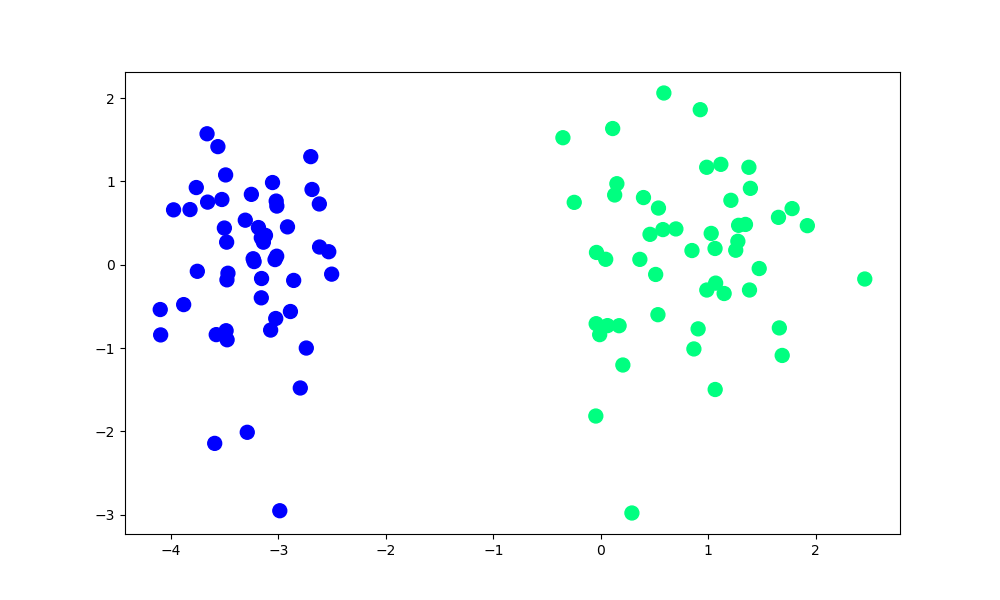

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [48]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [49]:
print(lor.coef_)
print(lor.intercept_)

[[4.84199091 0.21589056]]
[5.8179048]


In [56]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [57]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [58]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [59]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [60]:
coef_,intercept_ = gd(X,y)

In [61]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [62]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

<IPython.core.display.Javascript object>


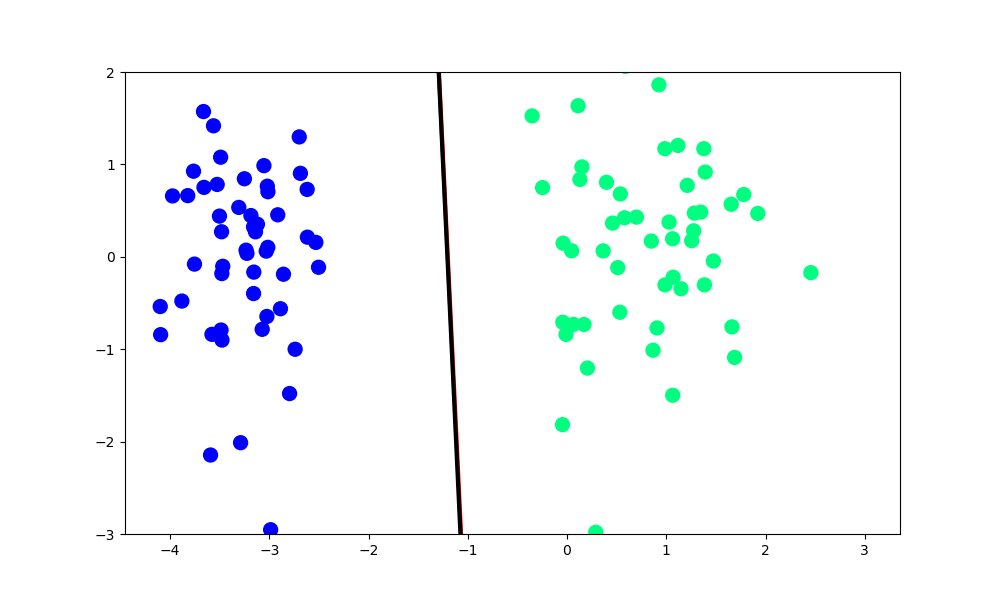

(-3.0, 2.0)

In [63]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [64]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [65]:
X1 = np.insert(X,0,1,axis=1)
np.ones(X1.shape[1])

array([1., 1., 1.])